In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from PIL import Image 

In [13]:
num_classes = 2

In [14]:
batch_size = 128
epochs = 24
input_shape = (64,64,3)

In [15]:
img_rows, img_cols = 64, 64

In [16]:
dog_path = Path("training_data") / "dogs"
not_dog_path = Path("training_data") / "not_dogs"

images = []
labels = []

In [17]:
for img in not_dog_path.glob("*.png"):
   
    img = image.load_img(img)
    image_array = image.img_to_array(img)
    images.append(image_array)
    labels.append(0)

In [18]:
for img in dog_path.glob("*.png"):
  
    img = image.load_img(img)
    image_array = image.img_to_array(img)
    images.append(image_array)
    labels.append(1)

In [19]:
x_data = np.array(images)

y_data = np.array(labels)

In [20]:
x_data.shape

(58, 64, 64, 3)

In [21]:
x_train = x_data[0:50,:,:,:]
x_test = x_data[50:,:,:,:]

y_train = y_data[0:50]
y_test = y_data[50:]


In [22]:
x_test.shape

(8, 64, 64, 3)

In [23]:
len(y_train)

50

In [24]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (50, 64, 64, 3)
x_test shape: (8, 64, 64, 3)
[0 0 0]


In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:1])

[[1. 0.]]


In [27]:
model = Sequential()

In [28]:

model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50 samples, validate on 8 samples
Epoch 1/24
50/50 [==============================] - 1s 12ms/step - loss: 0.7540 - acc: 0.4000 - val_loss: 3.7882 - val_acc: 0.0000e+00
Epoch 2/24
50/50 [==============================] - 0s 3ms/step - loss: 1.3472 - acc: 0.6400 - val_loss: 1.7294 - val_acc: 0.0000e+00
Epoch 3/24
50/50 [==============================] - 0s 4ms/step - loss: 0.7483 - acc: 0.6400 - val_loss: 0.8271 - val_acc: 0.0000e+00
Epoch 4/24
50/50 [==============================] - 0s 4ms/step - loss: 0.6544 - acc: 0.6000 - val_loss: 0.6330 - val_acc: 1.0000
Epoch 5/24
50/50 [==============================] - 0s 3ms/step - loss: 0.7303 - acc: 0.4600 - val_loss: 0.6252 - val_acc: 1.0000
Epoch 6/24
50/50 [==============================] - 0s 3ms/step - loss: 0.7425 - acc: 0.4400 - val_loss: 0.6882 - val_acc: 0.6250
Epoch 7/24
50/50 [==============================] - 0s 3ms/step - lo

Test loss: 1.0144264698028564
Test accuracy: 0.25


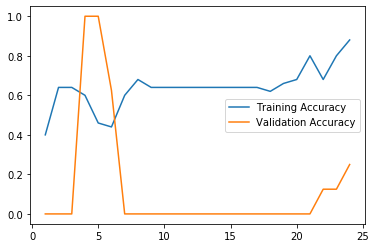

In [30]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [21]:
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)


model.save_weights("cnn_mnist_model_weights.h5")